In [21]:
import copy
import json
import glob
import os
import random

import matplotlib.pyplot as plt
import nltk as nltk
import numpy as np
from collections import Counter
import math
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from random import shuffle
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn import svm
from sklearn import metrics

from catboost import CatBoostRegressor, Pool


In [22]:
train = pd.read_csv('train.csv', index_col=0).sample(frac=1)
y_train = train['correct']
X_train = train[['name']]

test = pd.read_csv('test.csv', index_col=0).sample(frac=1)
y_test = test['correct']
X_test = test[['name']]


In [23]:
with open(os.path.join(os.getcwd(), 'FirstCharToNameList.txt'), 'r') as f:
    firstCharToNameList = json.load(f)

len(firstCharToNameList)

25

In [24]:
nameToProbability = {}
for ch in firstCharToNameList:
    names = firstCharToNameList[ch]
    N = len(names)
    for i, name in enumerate(names):
        nameToProbability[name] = (1.0 - i * 1.0 / N) ** 2


In [25]:
y_test_pred = [random.random() for name in X_test['name']]

In [26]:
#y_test_pred[:50]
len(y_test_pred)

107568

In [27]:
df_proba = pd.DataFrame(data=y_test_pred, columns=['proba'])
df_metric = pd.concat([df_proba, y_test.to_frame(), test[['group']]], axis=1)
df_metric = df_metric.sort_values(by=['group', 'proba', 'correct'], ascending=[True, False, True])
print(df_metric)

           proba  correct  group
3       0.927995        0     24
2       0.776016        0     24
1       0.680294        0     24
0       0.393837        1     24
7       0.368594        0     24
...          ...      ...    ...
107560  0.200476        1  42950
107567  0.147041        0  42950
107565  0.073652        0  42950
107564  0.067572        0  42950
107562  0.034435        0  42950

[107568 rows x 3 columns]


In [28]:
positions = []
cur_group = -1
cur_pos = 1
for row in df_metric.itertuples():
    cur_pos += 1
    if row.group != cur_group:
        cur_pos = 1
        cur_group = row.group
    if row.correct == 1:
        positions.append(cur_pos)

In [29]:
print(f'min = {np.min(positions)}')
print(f'max = {np.max(positions)}')
print(f'mean = {np.mean(positions)}')

min = 1
max = 8
mean = 4.522311468094601


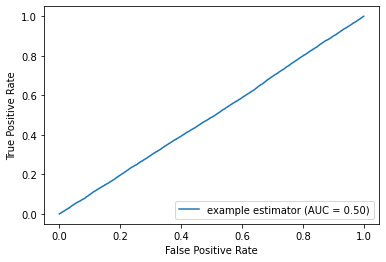

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(df_metric['correct'].tolist(), df_metric['proba'].tolist())
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

In [31]:
count = [0] * 9
for p in positions:
    count[p] += 1

acc = 0
sum_all = sum(count)
for i, c in enumerate(count):
    acc += c
    print(f'top{i} = {acc / sum_all}')

top0 = 0.0
top1 = 0.12479547820913282
top2 = 0.24475680499776886
top3 = 0.3695522832069017
top4 = 0.4951658485795032
top5 = 0.6218206157965194
top6 = 0.7480291536516436
top7 = 0.8735683474639298
top8 = 1.0


In [32]:
# y_train_pred = [nameToProbability[name] for name in X_train['name']]
# df_proba = pd.DataFrame(data=y_train_pred, columns=['proba'])
# df_metric = pd.concat([df_proba, y_train.to_frame(), train[['group']]], axis=1)
# df_metric = df_metric.sort_values(by=['group', 'proba', 'correct'], ascending=[True, False, True])
# print(df_metric)

In [33]:
# positions = []
# cur_group = -1
# cur_pos = 1
# for row in df_metric.itertuples():
#     cur_pos += 1
#     if row.group != cur_group:
#         cur_pos = 1
#         cur_group = row.group
#     if row.correct == 1:
#         positions.append(cur_pos)

In [34]:
# print(f'min = {np.min(positions)}')
# print(f'max = {np.max(positions)}')
# print(f'mean = {np.mean(positions)}')

In [35]:
# count = [0] * 9
# for p in positions:
#     count[p] += 1
#
# acc = 0
# sum_all = sum(count)
# for i, c in enumerate(count):
#     acc += c
#     print(f'top{i} = {acc / sum_all}')